# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('/content/drive/MyDrive/Dataset/haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

<h3>(Q) how many data-points and features?

In [6]:
df.shape

(306, 4)

<h3>(Q) What are the column names in our dataset?

In [7]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

<h3>Q) How many data points for each class are present? (or) How many flowers for each species are present?

In [8]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

<h3>
The data is unbalanced with ratio of 70:30

In [9]:
df.groupby('status').describe()

age                                                       year  \
        count       mean        std   min   25%   50%   75%   max  count   
status                                                                     
1       225.0  52.017778  11.012154  30.0  43.0  52.0  60.0  77.0  225.0   
2        81.0  53.679012  10.167137  34.0  46.0  53.0  61.0  83.0   81.0   

                   ...              nodes                                     \
             mean  ...   75%   max  count      mean       std  min  25%  50%   
status             ...                                                         
1       62.862222  ...  66.0  69.0  225.0  2.791111  5.870318  0.0  0.0  0.0   
2       62.827160  ...  65.0  69.0   81.0  7.456790  9.185654  0.0  1.0  4.0   

                    
         75%   max  
status              
1        3.0  46.0  
2       11.0  52.0  

[2 rows x 24 columns]

Patients who survived have mean nodes of 2.8 and 75% of nodes are 3

patients who did not survived have a mean node of 7.5 and 75% nodes are 11

- More the number of nodes less chances of survival

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

<h3> 
We are working on dataset for cancer prediction 

The  output  is binary varibale with values
- 1: If the patient survives treatment 5 year or longer
- 2: if the patient dies within 5 years.

We have feature like
- age : The age of patient
- year: year in which patient was operate data is from 1958 to 1970
- nodes: number of nodes detected (domain term)



### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

Text(0.5, 1.0, 'Age Distribution')

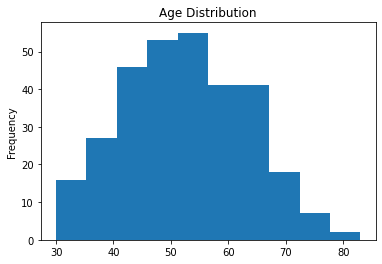

In [11]:
df['age'].plot(kind='hist')
plt.title('Age Distribution')

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


Text(0.5, 1.0, 'PDF AND CDF of age variable')

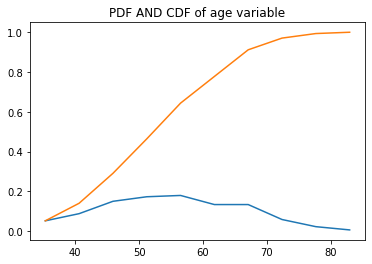

In [12]:
counts,bins  = np.histogram(df['age'])
pdf = counts/(sum(counts))
print(pdf);
print(bins);
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf);
plt.plot(bins[1:], cdf)
plt.title('PDF AND CDF of age variable')

Text(0.5, 1.0, 'Distribution of  age variable wrt to age')

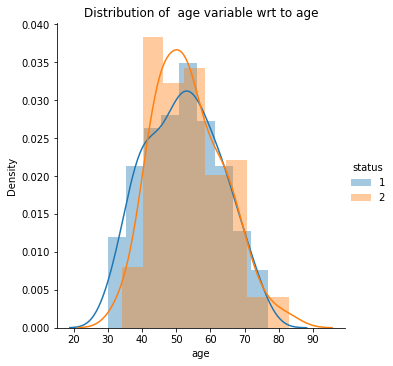

In [13]:
sns.FacetGrid(df, hue = 'status',size = 5).map(sns.distplot, 'age').add_legend()
plt.title('Distribution of  age variable wrt to age')


Text(0.5, 1.0, 'Nodes Distribution Histogram ')

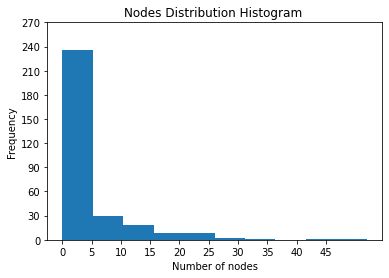

In [14]:
df['nodes'].plot(kind='hist')
plt.xticks(np.arange(0,50,step = 5))
plt.yticks(np.arange(0,300,step = 30))
plt.xlabel('Number of nodes')
plt.title('Nodes Distribution Histogram ')

No handles with labels found to put in legend.


[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


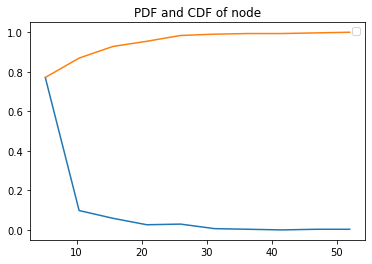

In [15]:
counts,bins  = np.histogram(df['nodes'])
pdf = counts/(sum(counts))
print(pdf);
print(bins);
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf);
plt.plot(bins[1:], cdf)
plt.title('PDF and CDF of node')
plt.legend()

([<matplotlib.axis.XTick at 0x7fd26b340690>,
 <a list of 24 Text major ticklabel objects>)

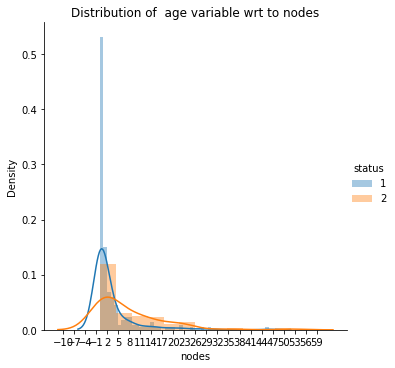

In [16]:
sns.FacetGrid(df, hue = 'status',size = 5).map(sns.distplot, 'nodes').add_legend()
plt.title('Distribution of  age variable wrt to nodes')
plt.xticks(np.arange(-10 ,60,step = 3))

Text(0.5, 1.0, 'Distribution of  age variable wrt to year')

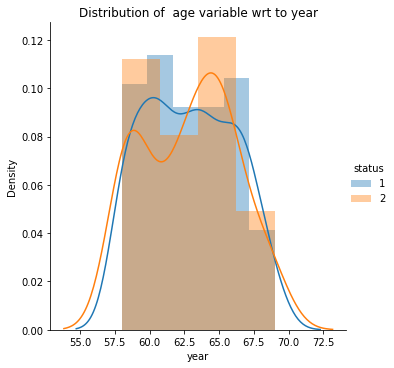

In [17]:
sns.FacetGrid(df, hue = 'status',size = 5).map(sns.distplot, 'year').add_legend()
plt.title('Distribution of  age variable wrt to year')

<h3> Conclusion

Age: 
- variable is not usefull as the plots are overlapping

Nodes:
- We can use this feature to separate data at value of approx 2 nodes to make a decision surface
- patients who had 2 nodes have more chances of success than patients having more than 2 nodes

Year:
- This is also not usefull feature


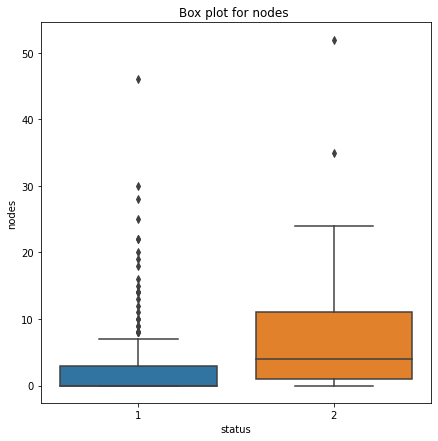

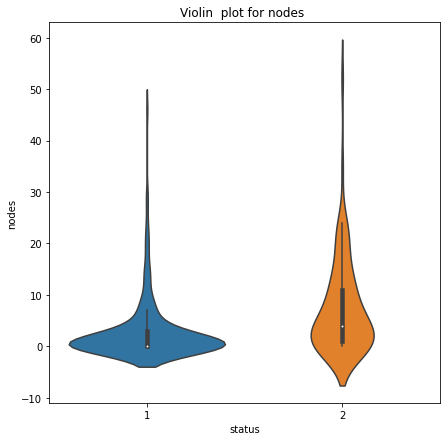

In [18]:
# Understanding the node variable more
plt.figure(figsize = (7,7))
plt.title('Box plot for nodes ')
sns.boxplot(x='status',y='nodes', data=df)
plt.show()


plt.figure(figsize = (7,7))
plt.title('Violin  plot for nodes ')
sns.violinplot(x='status',y='nodes', data=df)
plt.show()




- For otput var = 1
Data is less spread and has more outliers
- For otput var = 2
Data is more spread and has less outliers


### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


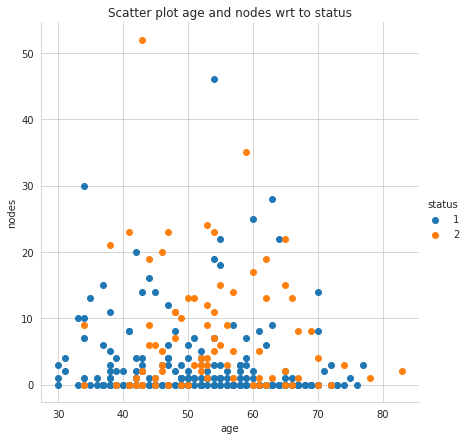

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=6).map(plt.scatter, "age", "nodes").add_legend()
plt.title('Scatter plot age and nodes wrt to status')
plt.show();

Text(0.5, 1.0, 'Pair plot')

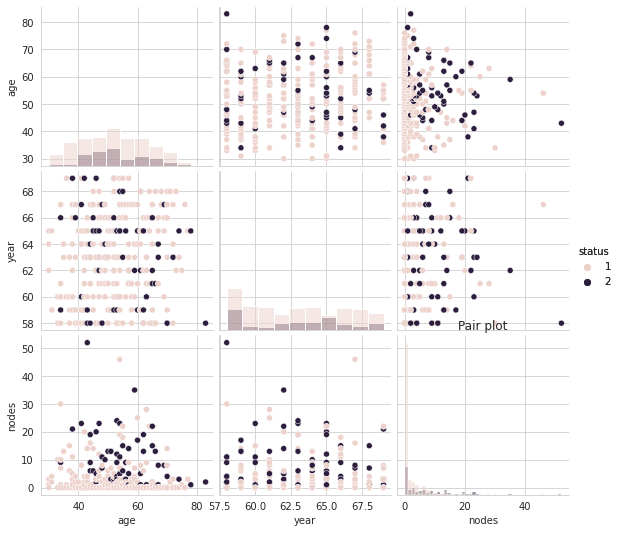

In [20]:
sns.pairplot(df,hue = 'status',diag_kind = 'hist').add_legend()
plt.title('Pair plot')

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

#Summary

The most important feature is number of nodes

 - Patients who survived have mean nodes of 2.8 and 75% of nodes are 3

- patients who did not survived have a mean node of 7.5 and 75% nodes are 11



The other feature age and year are overlapping hence not usefull

There is also a data imbalance of 70:30
- from the violin plot the number of outliers in label = 1 are more and variance is less 
- When we will balance data more points will be in outlier in label 2 varience will be more

More the number of nodes less chances of survival